In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
uptimes = pd.read_csv("Uptimes - posts_complete.csv")
uptimes = uptimes.loc[:, ['Post number', 'Title', 'Img OCR Text', 'Img Real Text', 'Uptimes']]
uptimes.tail()

,Post number,Title,Img OCR Text,Img Real Text,Uptimes
353,442,"Almost never reboot this box, everything it ru...",I was gonna show off my old Apple cube running...,NaN,1105.0
354,443,I was gonna show off my old Apple cube running...,Prone\n\n(EINES\n\n \n\n \n\nbh\n\n \n\n \n\nL...,NaN,NaN
355,444,My current highest uptime server.\n,"LS Ac haa Di iadlin cu\n11:56:10 up 320 days, ...",NaN,320.0
356,445,I know I got some boxes much higher than this..\n,matt@mail:~$ uptime\ncree te ee ee ry],NaN,280.0
357,447,Setting the bar high with a webserver:\n,os Ea Ta\nFae Ie yee eo ae TCE Ce OE a ee\nSet...,NaN,1049.0


In [3]:
def check_updays(text, index):    
    up = -1
    next_index = index+1
    if ( str.isnumeric(text[index]) and text[index+1].find('days') != -1 ): # 123 days!@
        up = text[index]
    elif (text[index].find('uptime') != -1 or text[index].find('up') != -1 or text[index].find('uptime:') != -1 or text[index].find('up:') != -1):
        if (text[index+2].find('days') != -1):
            if (str.isnumeric(text[index+1])):
                up = text[index+1]
                next_index += 1
    return up, next_index

ups = []
for i in range(len(uptimes)):
    text = str(uptimes.iloc[i, 2]).lower().split(" ")
    j = 0
    while j < len(text):
        if ((j+2) < len(text)):
            updays, cur_index = check_updays(text, j)
            j = cur_index
            if (updays != -1):
                ups.append(updays)
        else:
            j+=1
                       
ups = list(map(int, ups))

del(ups[ups.index(972240218)])

In [4]:
ups = uptimes.loc[pd.notna(uptimes['Uptimes'])]['Uptimes']
np.mean(ups)


1169.9358477011494

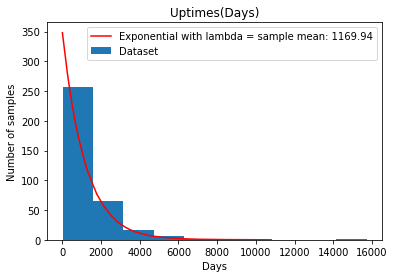

In [7]:

plt.hist(ups)
taxa = np.mean(ups)
# amostras = np.random.exponential(taxa, len(ups))
amostras = np.random.exponential(taxa, 10000)
plt.plot(sorted(amostras, reverse=True), np.linspace(0, len(ups), len(amostras)), 'r')
plt.xlabel("Days")
plt.ylabel("Number of samples")
plt.legend(["Exponential with lambda = sample mean: " + str(round(np.mean(ups), 2)), "Dataset"])
plt.title("Uptimes(Days)")
# plt.savefig("uptimes.png", format="png")

Text(0.5,0,'days')

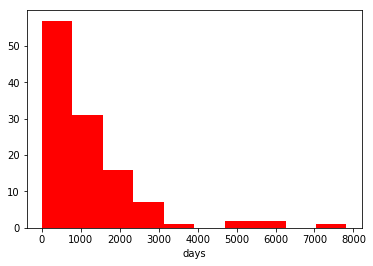

In [6]:
taxa = np.mean(ups)
amostras = np.random.exponential(taxa, len(ups))
plt.hist(amostras, color='r')
plt.xlabel("days")